In [2]:
import tensorflow as tf
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
import random


In [3]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(1, 2)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 6)              18        
                                                                 
 dense_1 (Dense)             (None, 1, 6)              42        
                                                                 
 dense_2 (Dense)             (None, 1, 6)              42        
                                                                 
 dense_3 (Dense)             (None, 1, 6)              42        
                                                                 
 dense_4 (Dense)             (None, 1, 6)              42        
                                                                 
 dense_5 (Dense)             (None, 1, 1)              7         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (7

In [4]:

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
# Print the dataset
dataset = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "y":y})
dataset

,X0,X1,y
0,-0.051470,0.444199,1
1,1.032017,-0.419741,1
2,0.867892,-0.254827,1
3,0.288851,-0.448669,1
4,-0.833439,0.535057,0
...,...,...,...
995,0.810647,0.527220,0
996,-0.162279,0.912738,0
997,1.684259,-0.348223,1
998,-0.967201,0.263672,0


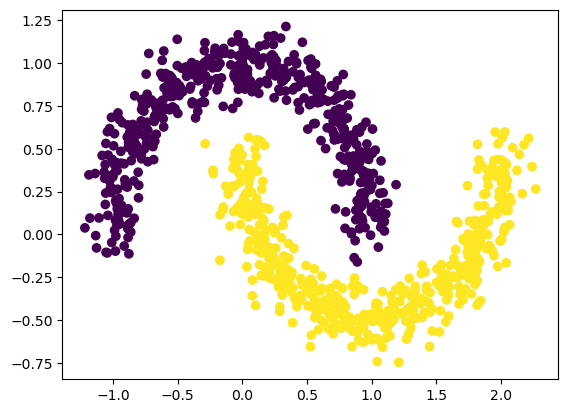

In [5]:
# Visualize our dataset

plt.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [7]:
# Create a model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
model_2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
25/25 [==============================] - 1s 14ms/step - loss: 0.7095 - accuracy: 0.3800 - val_loss: 0.6960 - val_accuracy: 0.4200
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.4925 - val_loss: 0.6696 - val_accuracy: 0.5150
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6538 - val_loss: 0.6434 - val_accuracy: 0.7350
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6216 - accuracy: 0.7837 - val_loss: 0.6129 - val_accuracy: 0.7750
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5876 - accuracy: 0.8037 - val_loss: 0.5789 - val_accuracy: 0.8400
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5503 - accuracy: 0.8313 - val_loss: 0.5422 - val_accuracy: 0.7500
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5110 - accuracy: 0.7862 - val_loss: 0.5049 - val_accuracy: 0.7400
Epoch 8/100


In [8]:
def plot_decision_boundary(model, x, y):
    """
    Plots the decision boundary created by a model predicting on X
    """
    
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    #make predictions
    y_pred = model.predict(x_in)
    
    #check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


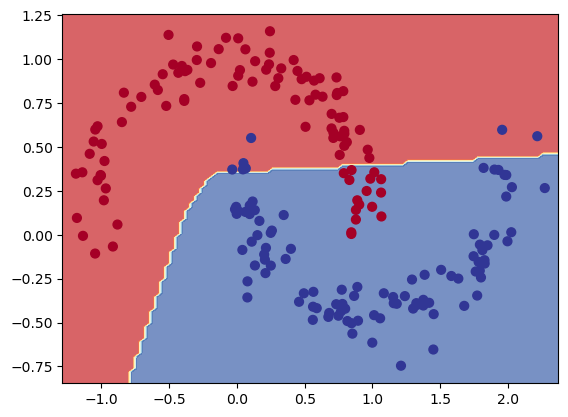

In [9]:
plot_decision_boundary(model_2, X_test, y_test)

## Train a model on the fashion MNIST

In [10]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
def visualize_random(train_data, train_labels):
    plt.figure(figsize=(7, 7))
    for i in range(4):
        ax = plt.subplot(2, 2, i+1)
        index = random.choice(range(len(train_data)))
        plt.imshow(train_data[index], cmap=plt.cm.binary)
        plt.title(class_name[train_labels[index]])
        plt.axis(False)

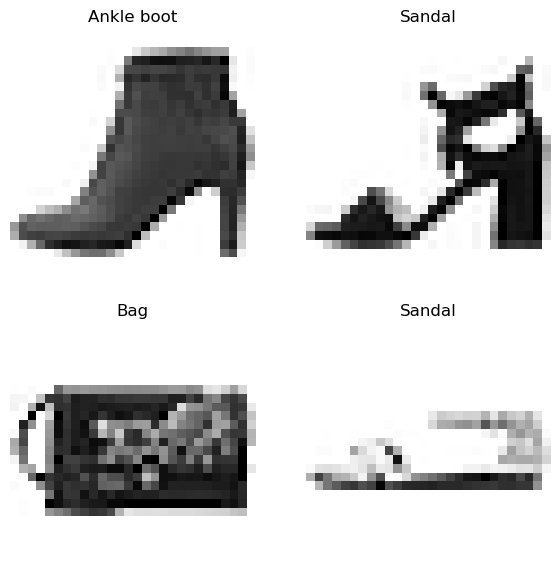

In [13]:
# Visulize random images

visualize_random(X_train, y_train)

In [14]:
def normalize_images(data):
    return tf.cast(data, tf.float32)/255.

In [15]:
X_train_norm = normalize_images(X_train)
X_test_norm = normalize_images(X_test)
X_train_norm.shape, X_train_norm.dtype, X_test_norm.shape, X_test_norm.dtype 

(TensorShape([60000, 28, 28]),
 tf.float32,
 TensorShape([10000, 28, 28]),
 tf.float32)

In [16]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
model_3.fit(X_train_norm, y_train, epochs=20, validation_data=(X_test_norm, y_test))


Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 1.0027 - accuracy: 0.6330 - val_loss: 0.7293 - val_accuracy: 0.7381
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6567 - accuracy: 0.7752 - val_loss: 0.6374 - val_accuracy: 0.7873
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5804 - accuracy: 0.8027 - val_loss: 0.5896 - val_accuracy: 0.7980
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5424 - accuracy: 0.8151 - val_loss: 0.5533 - val_accuracy: 0.8128
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5207 - accuracy: 0.8209 - val_loss: 0.5790 - val_accuracy: 0.8033
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5056 - accuracy: 0.8245 - val_loss: 0.5483 - val_accuracy: 0.8130
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4957 - accuracy: 0.8286 - val_loss: 0.5438 - val_accuracy:

In [17]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_4.compile(loss='sparse_categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
               metrics=['accuracy'])
model_4.fit(X_train_norm, y_train, epochs=10, validation_data=(X_test_norm, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7519 - accuracy: 0.7320 - val_loss: 0.5584 - val_accuracy: 0.8083
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4969 - accuracy: 0.8256 - val_loss: 0.5081 - val_accuracy: 0.8219
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4522 - accuracy: 0.8416 - val_loss: 0.5051 - val_accuracy: 0.8177
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4270 - accuracy: 0.8518 - val_loss: 0.4706 - val_accuracy: 0.8353
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4094 - accuracy: 0.8555 - val_loss: 0.4518 - val_accuracy: 0.8443
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3938 - accuracy: 0.8608 - val_loss: 0.4560 - val_accuracy: 0.8402
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3832 - accuracy: 0.8636 - val_loss: 0.4344 - val_accuracy:

In [18]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_4.compile(loss='sparse_categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
               metrics=['accuracy'])
history = model_4.fit(X_train_norm, y_train, epochs=10, validation_data=(X_test_norm, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5433 - accuracy: 0.8084 - val_loss: 0.4278 - val_accuracy: 0.8494
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3865 - accuracy: 0.8614 - val_loss: 0.4650 - val_accuracy: 0.8405
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3540 - accuracy: 0.8715 - val_loss: 0.3937 - val_accuracy: 0.8564
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3302 - accuracy: 0.8795 - val_loss: 0.4002 - val_accuracy: 0.8541
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3149 - accuracy: 0.8848 - val_loss: 0.3682 - val_accuracy: 0.8673
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3012 - accuracy: 0.8878 - val_loss: 0.3818 - val_accuracy: 0.8591
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2901 - accuracy: 0.8917 - val_loss: 0.3716 - val_accuracy:

In [23]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np 

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    


    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    #create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    

    if classes:
        labels = classes

    else:
        labels = np.arange(cm.shape[0])

    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)
    # Label the axes
    ax.set(title="Confusion Matrix",
            xlabel="Predicted Label",
            ylabel="True Label",
            xticks=np.arange(n_classes),
            yticks=np.arange(n_classes),
            xticklabels=labels,
            yticklabels=labels)

    threshold = (cm.max() + cm.min()) / 2.

    #plot the text on each cell

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

313/313 [==============================] - 1s 2ms/step


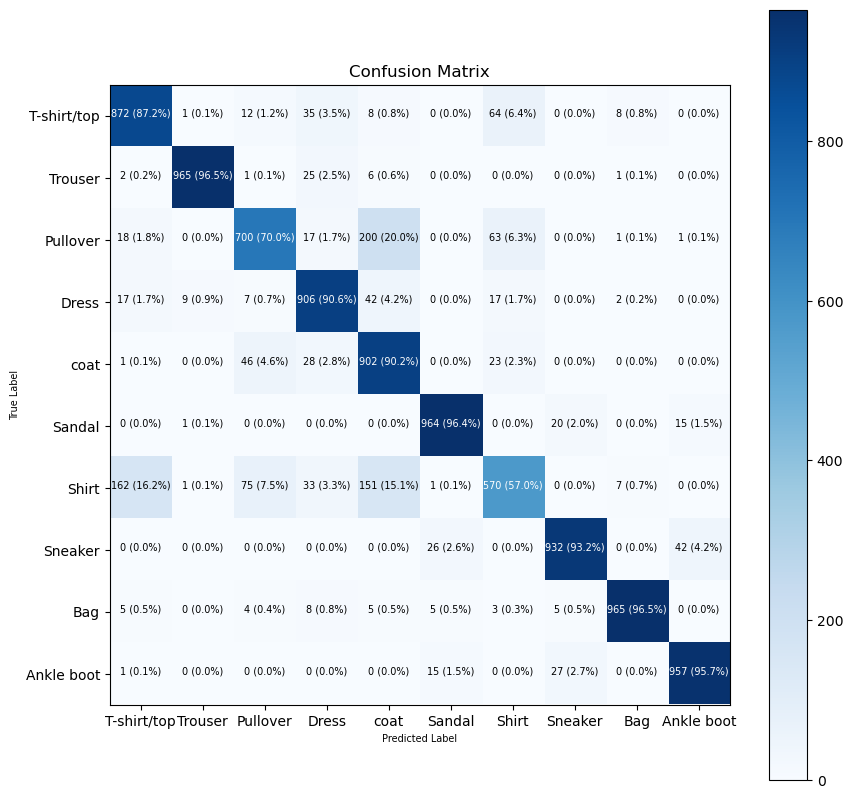

In [26]:
y_pred = model_4.predict(X_test_norm).argmax(axis=1)
make_confusion_matrix(y_test, y_pred, classes=class_name, text_size=7)

In [31]:
# Create softmax function
def softmax(logits):
    return tf.exp(logits) / tf.reduce_sum(tf.exp(logits))

In [32]:
logits = tf.constant([1, 2, 3, 6], dtype=tf.float32)
softmax(logits)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.00626879, 0.01704033, 0.04632042, 0.93037045], dtype=float32)>